<a href="https://colab.research.google.com/github/apoorva666/NLP/blob/main/OCR%20Using%20GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Using 'gemini-1.5-flash' to perform OCR & answer questions in natural
language***

In [1]:
# Model imports
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Image

In [2]:
# Install packages
!pip install gdown
!pip install google-generativeai
!pip install Pillow
!pip install matplotlib

**IMAGE 1**

Mounted at /content/drive


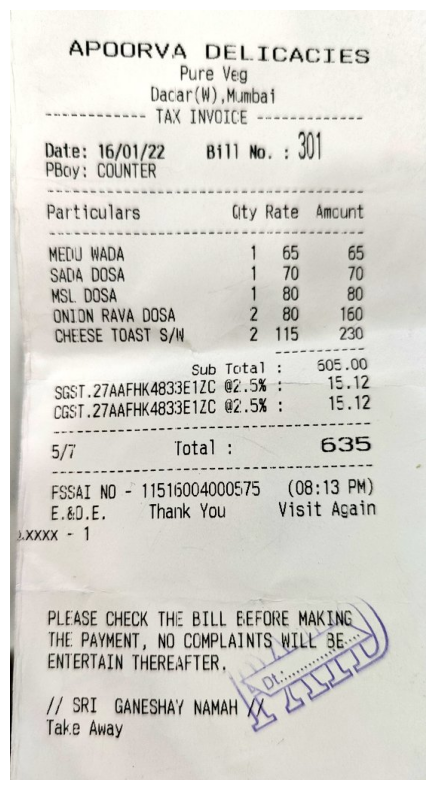

Prompt: I want you to give me a list of all the items, with their cost as well as the breakdown
Result: - **Medu Wada** 1 x 65 = 65
- **Sada Dosa** 1 x 70 = 70
- **Msl. Dosa** 1 x 80 = 80
- **Onion Rava Dosa** 2 x 80 = 160
- **Cheese Toast S/W** 2 x 115 = 230

**Subtotal:** 605.00
**SGST (2.5%)**: 15.12
**CGST (2.5%)**: 15.12

**Total:** 635.00
############
Prompt: What percent of the bill contributes to taxes?
Result: The total of the bill is 635, and the taxes are 30.12, so the percentage of taxes in the bill is 30.12 / 635 = 0.0474, or 4.74%.
############
Prompt: Name the merchant
Result: APOORVA DELICACIES.
############


In [3]:
# Imports
from google.colab import drive
from google import generativeai as genai
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# Create an instance of the GenerativeModel class with the model name 'gemini-1.5-flash'
model = genai.GenerativeModel('gemini-1.5-flash')

# Mount Google Drive
drive.mount('/content/drive')

def process_image_with_prompts(image_path, prompts):
    # Configure the generative model API
    genai.configure(api_key="^^^^^^^^^^^^^^^^^^^")

    # Function to display the downloaded image
    def show_image(image_path):
        # Ensure image format is in RGB mode
        try:
            image_pil = Image.open(image_path)
            if image_pil.mode != 'RGB':
                image_pil = image_pil.convert('RGB')
            plt.figure(figsize=(10, 10))  # Adjusting figsize for larger display

            plt.imshow(image_pil)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"An error occurred while opening the image: {e}")
            return

    # Display the image from Google Drive
    show_image(image_path)

    # Prepare the image for processing
    try:
        image_pil = Image.open(image_path)
        if image_pil.mode != 'RGB':
            image_pil = image_pil.convert('RGB')
    except Exception as e:
        print(f"An error occurred while preparing the image: {e}")
        return

    # Call the API with the image and each prompt
    results = []
    try:
        for prompt in prompts:
            # API call
            result = model.generate_content([prompt, image_pil])
            results.append(result.text)
    except Exception as e:
        print(f"An error occurred during API call: {e}")

    # Print the prompts and results together
    for prompt, result in zip(prompts, results):
        print(f"Prompt: {prompt}\nResult: {result}\n############")

# Argument values
image_path = "/content/drive/My Drive/^^^^^^^^^/Food Bill.jpg"
prompts = ['''I want you to give me a list of all the items, with their cost as well as the breakdown''',
           '''What percent of the bill contributes to taxes?''',
           '''Name the merchant''']

# Call the function with the image path & prompts
process_image_with_prompts(image_path, prompts)


**IMAGE 2**

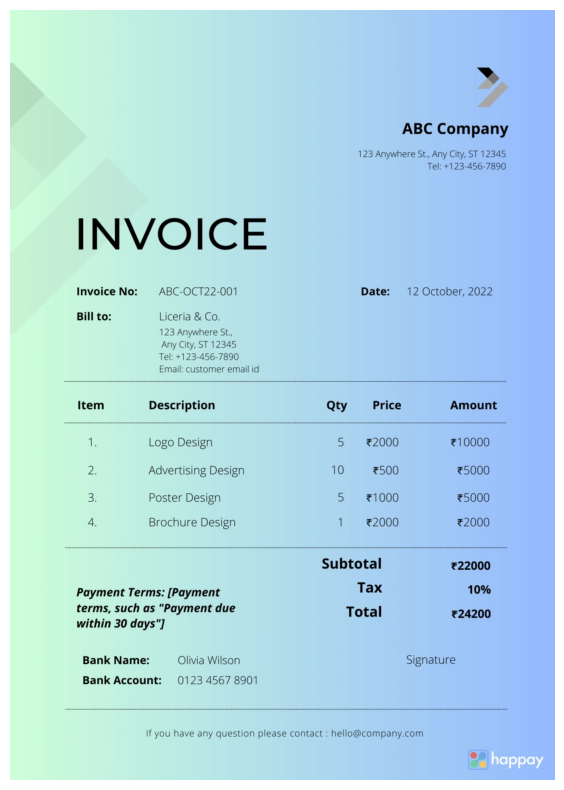

Prompt: What items do the bill contain?
Result: The bill contains the following items:
- Logo Design
- Advertising Design
- Poster Design
- Brochure Design
############
Prompt: What is the invoice number?
Result: The invoice number is ABC-OCT22-001.
############


In [4]:
image_path2 = "/content/drive/My Drive/^^^^^^^^^/happay.webp"
prompts2 = ['''What items do the bill contain?''',
            '''What is the invoice number?''']

# Call the function with the image path & prompts
process_image_with_prompts(image_path2, prompts2)

**Image 3**

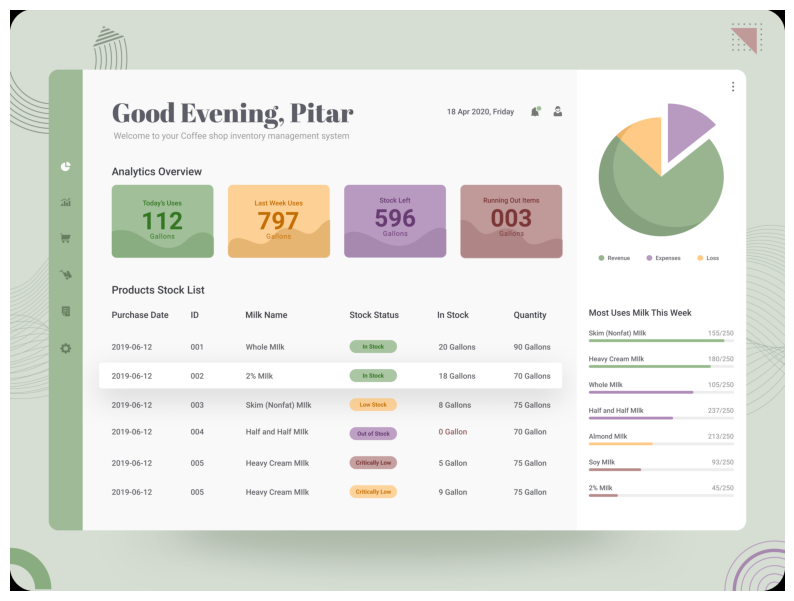

Prompt: What is the report about?
Result: The report is about the inventory management of a coffee shop. It shows the current stock levels of different types of milk, as well as the sales data for the day and the past week. It also shows which milk types are running out and which are the most used this week.
############
Prompt: Summarize the report with the figures
Result: The report shows the analytics overview of a coffee shop inventory management system. The shop has sold 112 gallons of milk today and 797 gallons last week. There are 596 gallons of milk in stock and 3 gallons running out. The pie chart shows the revenue, expenses and loss of the shop. The table shows the products stock list, including the purchase date, ID, milk name, stock status, in stock quantity, and total quantity. The most used milk this week are skim (nonfat) milk (155/250), heavy cream milk (180/250), whole milk (105/250), half and half milk (237/250), almond milk (213/250), soy milk (93/250), and 2% milk (

In [9]:
image_path3 = "/content/drive/My Drive/^^^^^^^^^^/product_stock_list.png"
prompts3 = ['''What is the report about?''',
            "Summarize the report with the figures",
            "What quantity of heavy cream milk has been sold over the week?"]

# Call the function with the image path & prompts
process_image_with_prompts(image_path3, prompts3)